# Analysis of velocity based on events
Noteboook for methodology of correlating the calculated angular velocity of a rat to velocity of event extracted from event log.

In [13]:
import numpy as np
import pandas as pd
import h5py
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate, signal

%matplotlib inline
sns.set(color_codes=True)

path = '../datasets/analysis/'

fname = [
    'VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC',
    'VRAcuityExp_2017-07-13_15-05-16_VR-2B_NIC',
    'VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU',
    'VRAcuityExp_2017-07-13_15-38-34_VR-1A_NIC',
    'VRAcuityExp_2017-07-13_15-53-40_VR-1B_NIC',
    'VRAcuityExp_2017-07-13_16-11-46_VR-3A_NIC',
    'VRAcuityExp_2017-07-13_16-27-08_VR-3A_NIC',
    'VRAcuityExp_2017-07-13_17-09-07_VR-5A_NIC', ]

event = {}
dfV = {}
dfU = {}
dfFil = {}

for i, x in enumerate(fname):
    event[i] = pd.read_hdf(path+x+'_event.h5'   , 'Event')      
    dfV[i]   = pd.read_hdf(path+x+'_velocity.h5', 'Full' )      
    dfU[i]   = dfV[i].drop({'X_Ori', 'Y_Ori', 'Z_Ori', 'dTime', 'lx1', 'lz1', 'lx2', 'lz2'}, axis=1)
    

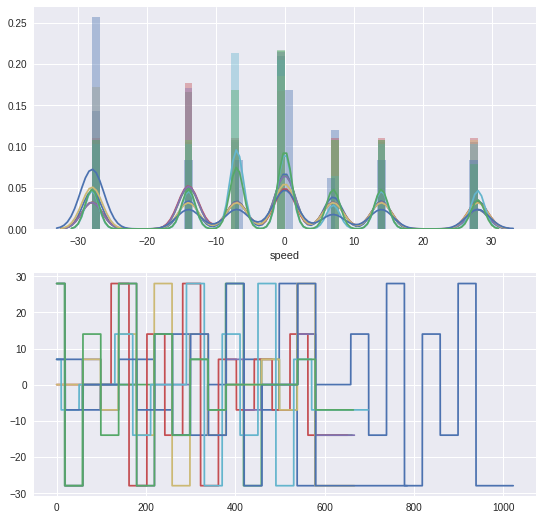

In [14]:
# grid velocity plots for all experiments
fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for i in range(0, len(fname)):
    sns.distplot(event[i].speed, ax=ax1)
    ax2.plot    (event[i].Time , event[i].speed)

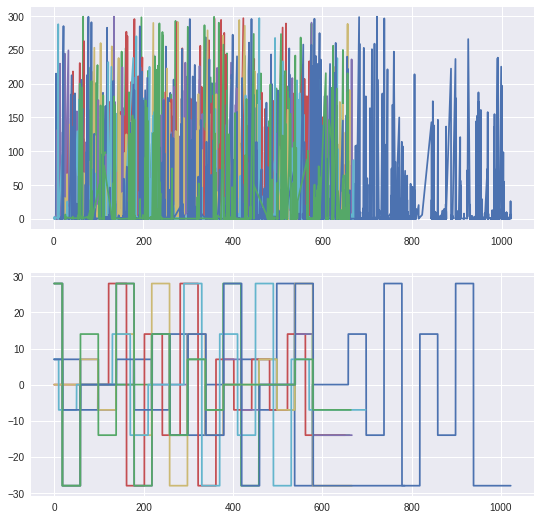

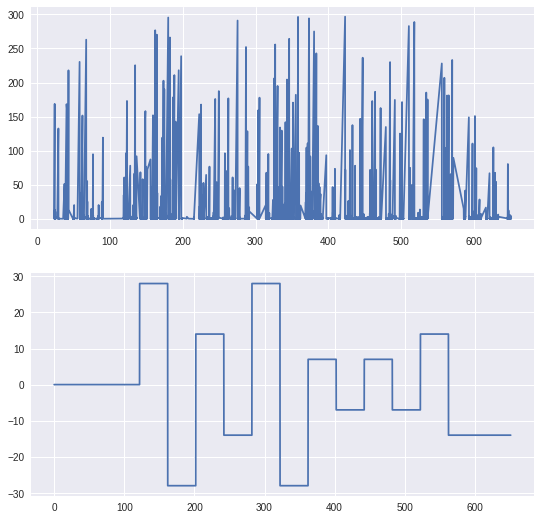

In [15]:
# print of the data to be compared  
fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
    
for i, x in enumerate(fname):
    ax1.plot(dfV[i].Time  , dfV[i].U)
    ax2.plot(event[i].Time, event[i].speed)
    
fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
    
ax1.plot(dfV[2].Time  , dfV[2].U)
ax2.plot(event[2].Time, event[2].speed)

## Cross - correlation of the signals

In [16]:
# single experiment analysis
i = 0

df = pd.merge(event[i], dfU[i], on='Frame')
df.drop({'Time_y','Vxyz', 'theta'}, axis=1, inplace=True)

df.corr  = signal.correlate(df.speed, df.U, mode='same') / 128
df.corrZ = signal.correlate(df.speed, df.UZero, mode='same') / 128


/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


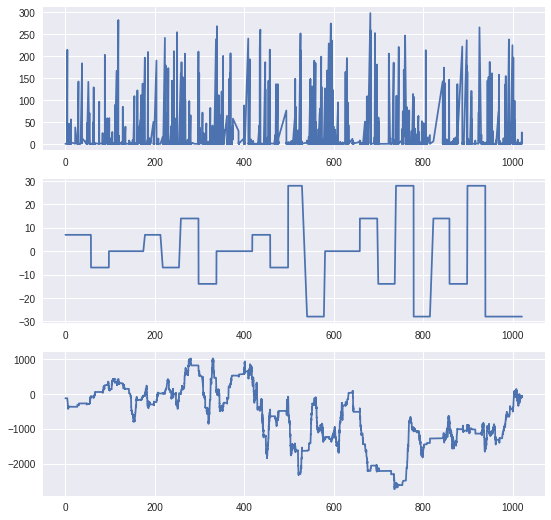

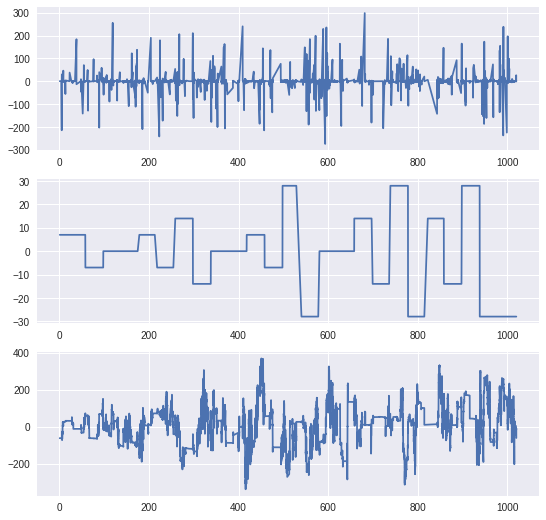

In [17]:
x# plot fof single event
fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
    
ax1.plot(df.Time_x, df.U)
ax2.plot(df.Time_x, df.speed)
ax3.plot(df.Time_x, df.corr)

x# plot fof single event
fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
    
ax1.plot(df.Time_x, df.UZero)
ax2.plot(df.Time_x, df.speed)
ax3.plot(df.Time_x, df.corrZ)


In [18]:
# all experiments analysis
df = {}
for i, x in enumerate(fname):
    df[i] = pd.merge(event[i], dfU[i], on='Frame')
    df[i].drop({'Time_y','Vxyz', 'theta'}, axis=1, inplace=True)
    df[i].corr = signal.correlate(df[i].speed, df[i].U, mode='same') / 128
    df[i].corrZ = signal.correlate(df[i].speed, df[i].UZero, mode='same') / 128


/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


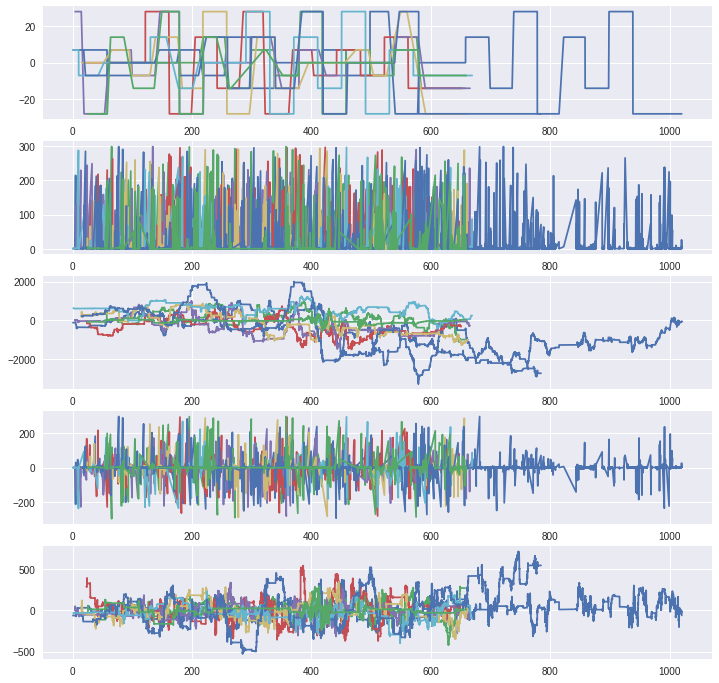

In [19]:
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)

for i, x in enumerate(fname):
    ax1.plot(df[i].Time_x, df[i].speed)
    ax2.plot(df[i].Time_x, df[i].U)
    ax3.plot(df[i].Time_x, df[i].corr)
    ax4.plot(df[i].Time_x, df[i].UZero)
    ax5.plot(df[i].Time_x, df[i].corrZ)


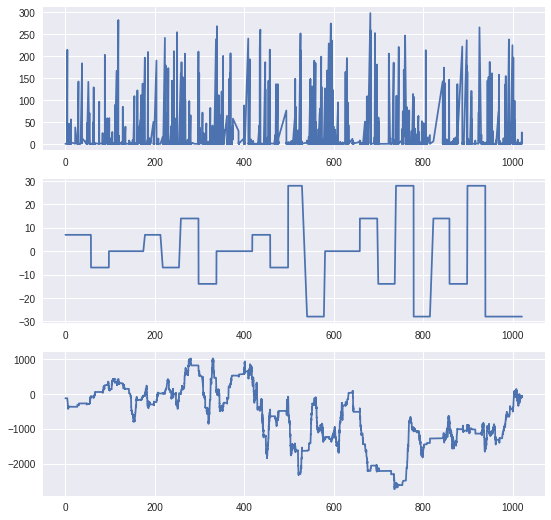

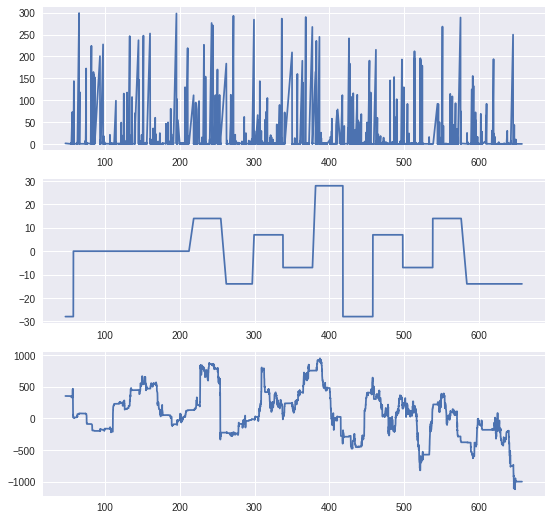

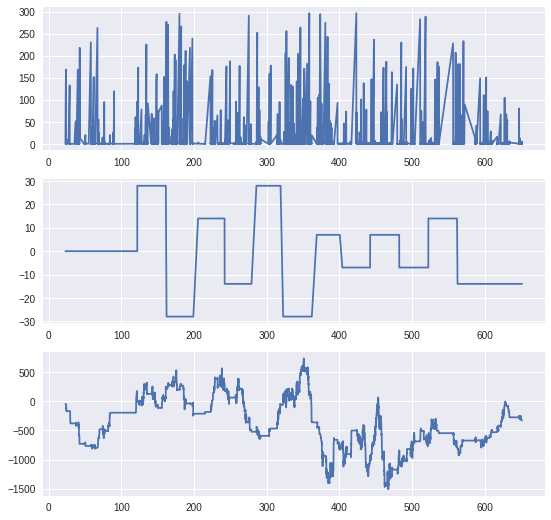

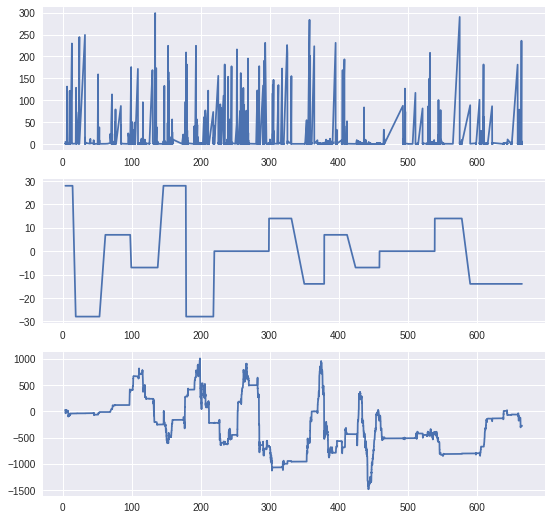

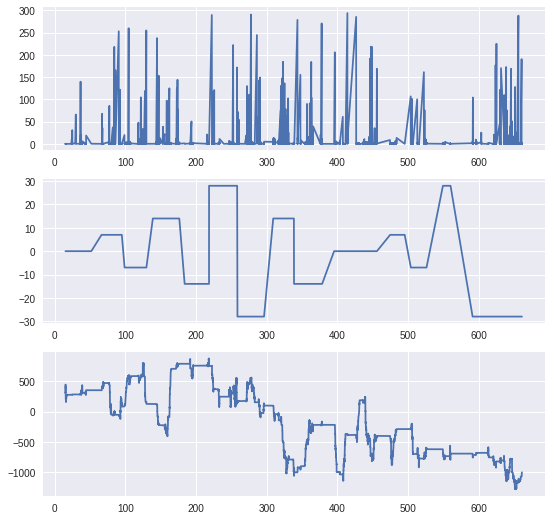

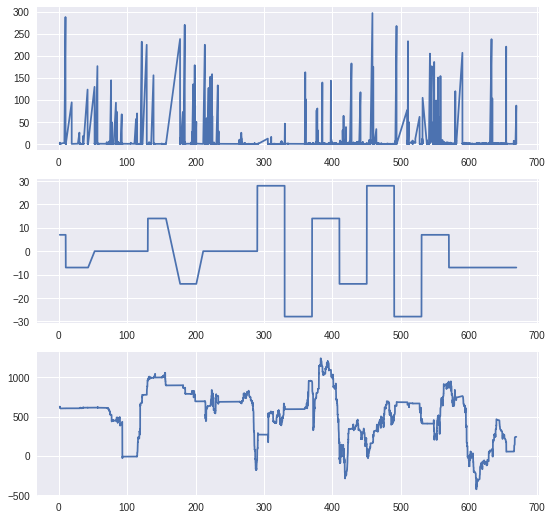

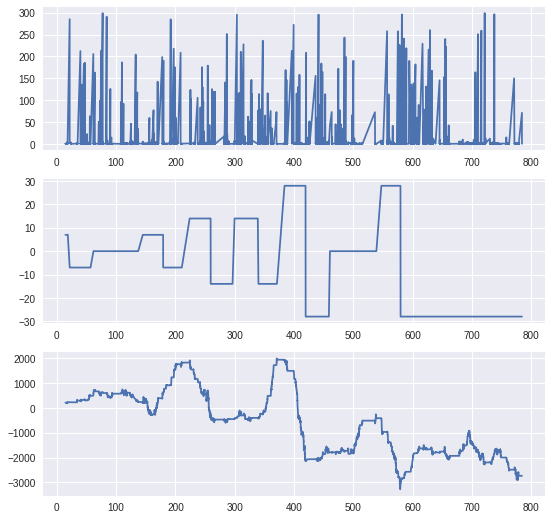

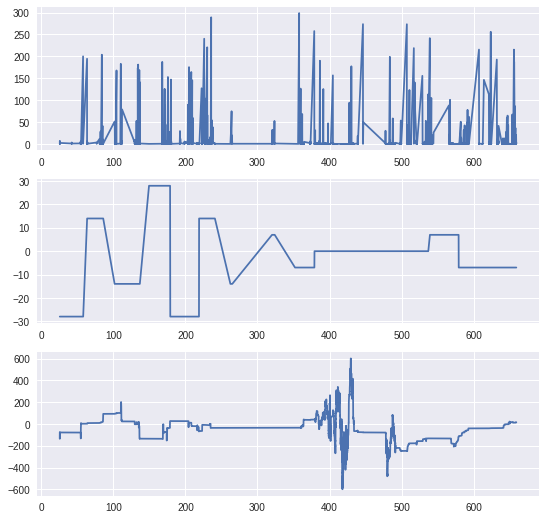

In [20]:
for i, x in enumerate(fname):
    fig = plt.figure(figsize=(9,9))

    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)

    ax1.plot(df[i].Time_x, df[i].U)
    ax2.plot(df[i].Time_x, df[i].speed)
    ax3.plot(df[i].Time_x, df[i].corr)


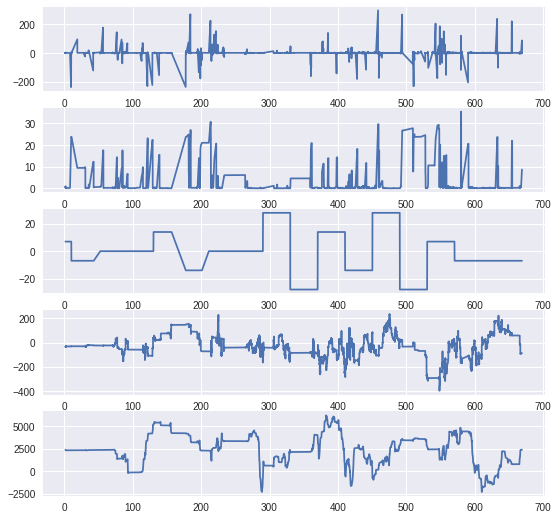

In [22]:
i = 5

# averging the signal
WINDOW_SIZE = 100
window = []; rms = []

for ii in range(0, len(df[i])):
  
    if len(window) > WINDOW_SIZE:
        del window[0]

    window.append(df[i].iloc[ii].UZero)
    w = np.array(window)
    rms.append(np.sqrt(np.mean(w**2)))
    
df[i].corr2 = signal.correlate(df[i].speed, rms, mode='same') / 128

## Plotting
fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)

ax1.plot(df[i].Time_x, df[i].UZero)
ax2.plot(df[i].Time_x, rms)
ax3.plot(df[i].Time_x, df[i].speed)
ax4.plot(df[i].Time_x, df[i].corrZ)
#ax4.plot(df[i].Time_x, df[i].corr2)
ax5.plot(df[i].Time_x, df[i].corr2)

In [ ]:
## TODO: clean up for clear comparinson of two velocities and different window sizes

# averging the signal
WINDOW_SIZE = 100

for i, x in enumerate(fname):
    window = []; rms = []

    for ii in range(0, len(df[i])):
  
        if len(window) > WINDOW_SIZE:
            del window[0]

        window.append(df[i].iloc[ii].UZero)
        w = np.array(window)
        rms.append(np.sqrt(np.mean(w**2)))

    df[i]['rms'] = rms
    df[i].corr2 = signal.correlate(df[i].speed, rms, mode='same') / 128


In [ ]:
## Plotting
i = 2
fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)

ax1.plot(df[i].Time_x, df[i].UZero)
ax2.plot(df[i].Time_x, df[i].rms)
ax3.plot(df[i].Time_x, df[i].speed)
ax4.plot(df[i].Time_x, df[i].corrZ)
ax5.plot(df[i].Time_x, df[i].corr2)

In [ ]:
## Plotting
fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)

for i, x in enumerate(fname):
    ax1.plot(df[i].Time_x, df[i].U)
    ax2.plot(df[i].Time_x, df[i].rms)
    ax3.plot(df[i].Time_x, df[i].speed)
    ax4.plot(df[i].Time_x, df[i].corr)
    ax5.plot(df[i].Time_x, df[i].corr2)

In [ ]:
x = df[i].speed
y = df[i].rms

p = stats.pearsonr(x, y)
print(p)